<a href="https://colab.research.google.com/github/kiharalab/Emap2secPlus/blob/master/Emap2sec%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emap2Sec+

<p align="center">
  <img src="https://user-images.githubusercontent.com/50850224/192009827-61c1dcf2-89bf-4154-8424-ef31be522821.png" width="300">
</p>
Emap2sec+ is a computational tool using deep learning that can accurately identify structures, alpha helices, beta sheets, other(coils/turns) and DNA/RNA, in cryo-Electron Microscopy (EM) maps of medium to low resolution.  

<b>License:</b> GPL v3 for academic use. (For commercial use, please contact us for different licensing)

<b>Contact:</b> Daisuke Kihara (dkihara@purdue.edu)

Copyright (C) 2020 Xiao Wang, Eman Alnabati, Tunde W Aderinwale, Sai Raghavendra Maddhuri, Genki Terashi, Daisuke Kihara, and Purdue University. 

[Xiao Wang, Eman Alnabati, Tunde W Aderinwale, Sai Raghavendra Maddhuri Venkata Subramaniya, Genki Terashi & Daisuke Kihara. Detecting protein and DNA/RNA structures in cryo-EM maps of intermediate resolution using deep learning. Nature Commununications 12, 2302 (2021).](https://www.nature.com/articles/s41467-021-22577-3)



### Project website: http://kiharalab.org/emsuites/emap2secplus.php

# Run Emap2Sec+ pipeline (6 steps)

1. Install dependencies : Install libraries and download the models
2. Input cryo-EM Map : Upload the cryo-em map file, the input file .map
3. Input contour level : Set the contour level
4. Run Emap2Sec+ : Run the Deep Learning model pipeline (pre-process, inference, post-process)
5. Download estimation output : Download the resulting files
6. Visualize the prediction : Visualize the .pdb file with predicted results in 3D

Please make sure the notebook is already connected to **GPU**, Emap2sec+ needs GPU support to run.<br>
Click the right top button **"connect"**, then the notebook will automatically connect to a gpu machine
After running this cell, you will need to restart the notebook (runtime). Simply click on the restart runtime button in the cell output

First we need to install Conda package manager to install dependencies. <br> 

In [ ]:
#@title Install Conda <a name="Dependency"></a>
#@markdown First we need to install Conda package manager to install dependencies. <br> 
#@markdown <b> Please note that, after running this cell the notebook will automatically restart the session. Please ignore the session crashed message pop up that will appear on the bottom left.</b></span>
!pip uninstall torch -y
!sudo apt-get --purge remove cuda
!apt autoremove 

!pip install condacolab
import condacolab
condacolab.install()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'cuda' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✨🍰✨ Everything looks OK!


In [ ]:
#@title Install dependencies <a name="Dependency"></a>
#@markdown Now with the help of conda we will intall all other dependencies.<br><br>
# <b>Please restart the notebook after running this cell by clicking at restart runtime button at the end of the output of this cell. And continue running the follwoing cells</b><br>

!conda install pytorch==1.1.0 torchvision==0.3.0 cudatoolkit=10.0 -c pytorch
# !pip install torch==1.1.0 torchvision==0.3.0
%mkdir /content/results

%cd /content

!git clone "https://github.com/kiharalab/Emap2secPlus.git"

%cd Emap2secPlus

# download the model tar file
!wget "https://kiharalab.org/emsuites/emap2secplus_model/best_model.tar.gz"
!tar -xvzf best_model.tar.gz

!pip install py3Dmol
!pip install llvmlite==0.31.0
!pip install numba
!pip install -U --no-cache-dir \
    mrcfile==1.4.2 \
    numpy==1.18.5 \
    scipy==1.4.1
  
import urllib.request

get_url= urllib.request.urlopen('https://kiharalab.org/emsuites/emap2secplus_count.php?pwd=daq_dklab')

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
#@title Input cryo-EM map <a name="Map"></a>
#@markdown You can tick the below checkbox to use default  cryo-EM map as example <br>
#@markdown Please untick the following checkbox and run the cell to upload your cryo-EM map file.   
#@markdown <br>
#@markdown <br> **Support file format: .map**
from google.colab import files
import os
import os.path
import re
import hashlib
import random
import string

input_map = ""

rand_letters = string.ascii_lowercase
rand_letters = ''.join(random.choice(rand_letters) for i in range(20))
use_author_example = False #@param {type:"boolean"}
if not use_author_example:
  root_dir = "/content/Emap2secPlus/"
  upload_dir = os.path.join(root_dir,rand_letters)
  if not os.path.exists(upload_dir):
    os.mkdir(upload_dir)
  os.chdir(upload_dir)
  map_input = files.upload()
  for fn in map_input.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(map_input[fn])))
    input_map = os.path.abspath(fn)
    print("Map save to %s"%input_map)
  os.chdir(root_dir)
else:
  print("you have chosen to use author's example, you can not upload map files any more.")
  input_map = "emd_3949.map"

Saving emd_3949.map to emd_3949.map
User uploaded file "emd_3949.map" with length 18967552 bytes
Map save to /content/Emap2secPlus/ejmxywrgfivblduaqklq/emd_3949.map


In [ ]:
#@title Input contour level
#@markdown Specify the recommended contour level for your map in contour_level variable.
#@markdown If your recommended contour level is 2.5 then enter 2.5 in the input filed below
contour_level = 0.075 #@param {type:"number"}


In [ ]:
#@title Run Emap2SecPlus
#@markdown The Emap2SecPlus model will run and the whole pipeline will be executed sequentially. And a .pdb file will be saved as a result.
#!/bin/bash

!rm -rf "/content/results/REAL/"
!pwd
!chmod +x *
!chmod -R 777 /content/Emap2secPlus

%cd /content/Emap2secPlus

# #Inputs (if map and contour_level are found empty, then they are set to default values)
if input_map == "":
  input_map='emd_3949.map'

if contour_level == "":
  contour_level=0.075

output_dir="../results/"


!python main.py --mode=2 -F="{input_map}" --type=3 --gpu=0 --class=4 --contour="{contour_level}" --output_folder="{output_dir}"
!echo "INFO : Emap2sec+ Done"

/content/Emap2secPlus
/content/Emap2secPlus
../results/ existed
../results/REAL created
../results/REAL/emd_3949 created
Origin: (0., 0., 0.)
Previous voxel size: 1.399999976158142
Previouse size: (168, 168, 168)  Current map size: 235 235 235
Finished %d 10
Finished %d 20
Finished %d 30
Finished %d 40
Finished %d 50
Finished %d 60
Finished %d 70
Finished %d 80
Finished %d 90
Finished %d 100
Finished %d 110
Finished %d 120
Finished %d 130
Finished %d 140
Finished %d 150
Finished %d 160
Finished %d 170
Finished %d 180
Finished %d 190
Finished %d 200
Finished %d 210
Finished %d 220
Finished %d 230
nx              : 168
ny              : 168
nz              : 168
mode            : 2
nxstart         : 0
nystart         : 0
nzstart         : 0
mx              : 168
my              : 168
mz              : 168
cella           : (235.2, 235.2, 235.2)
cellb           : (90., 90., 90.)
mapc            : 1
mapr            : 2
maps            : 3
dmin            : -0.05837386101484299
dmax        

In [ ]:
#@title Download predicted output <a name="Download"></a>
#@markdown The pdb file with estimated score will be compressed and downloaded. You can visualize your structure score by Pymol.

map_res_name = input_map.split('/')[-1].split('.')[0]
cd_path = f"/content/results/REAL/{map_res_name}/Final/"
%cd {cd_path}

from google.colab import files
import os

zip_format = True #@param {type:"boolean"} 
#@markdown If you want to download tar.gz format file, do not choose **zip_format** box.
download_file_path = f"{map_res_name}Final_pred.pdb"
print(download_file_path)
if zip_format:
  target_path = "result.zip"
else:
  target_path = "result.tar.gz"

if zip_format:
  os.system(f"zip {target_path} {download_file_path}")
else:
  os.system(f"tar -zcvf {target_path} {download_file_path}")
files.download(target_path)


#@title Download predicted output <a name="Download"></a>
#@markdown The pdb file with estimated score will be compressed and downloaded. Alos, a python script will be downladed using which you can visualize the Emap2Sec output using by Pymol.

map_res_name = input_map.split('/')[-1].split('.')[0]
cd_path = f"/content/results/REAL/{map_res_name}/Final/"
%cd {cd_path}

from google.colab import files
import os

!cp /content/Emap2sec/Visual/pymol_script.py /content/results
zip_format = True #@param {type:"boolean"} 
#@markdown If you want to download tar.gz format file, do not choose **zip_format** box.
download_file_path = "visual.pdb"
if zip_format:
  target_path = "result.zip"
else:
  target_path = "result.tar.gz"

if zip_format:
  os.system(f"zip {target_path} {download_file_path} pymol_script.py")
else:
  os.system(f"tar -zcvf {target_path} {download_file_path} pymol_script.py")
files.download(target_path)

/content/results/REAL/emd_3949/Final
emd_3949Final_pred.pdb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

True


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

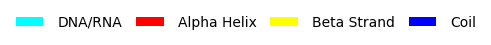

In [ ]:
#@title Model prediction visualization (3D) <a name="Visualization"></a>
#@markdown The model prediction saved in pdb file will be visualized using 3Dmol.js library. Please look at the output of the cell below.
import os
import matplotlib.pyplot as plt

def plot_plddt_legend():
  thresh = ['DNA/RNA', 'Alpha Helix', 'Beta Strand', 'Coil']
  plt.figure(figsize=(1,0.1),dpi=100)
  ########################################
  for c in ["#00FFFF", "#FF0000", "#FFFF00", "#0000FF"]:
    plt.bar(0, 0, color=c)
  plt.legend(thresh, frameon=False,
             loc='center', ncol=6,
             handletextpad=1,
             columnspacing=1,
             markerscale=0.5,)
  plt.axis(False)
  return plt

#Visualize
import py3Dmol
def show_pdb(output_pdb_path):
  view = py3Dmol.view(js='https://3dmol.org/build/3Dmol.js',)
  print(os.path.exists(output_pdb_path))
  view.addModel(open(output_pdb_path,'r').read(),'pdb')
  view.setStyle({'chain':'A'},{'sphere': {'color':'green'}})
  view.setStyle({'chain':'B'},{'sphere': {'color':'yellow'}})
  view.setStyle({'chain':'C'},{'sphere': {'color':'red'}})
  view.setStyle({'chain':'D'},{'sphere': {'color':'cyan'}})
  view.zoomTo()
  return view
map_res_name = input_map.split('/')[-1].split('.')[0]
show_pdb(f"/content/results/REAL/{map_res_name}/Final/{map_res_name}Final_pred.pdb").show()
plot_plddt_legend().show() 

## Note for PyMol visualization
You can also visualize the predicted output of the Emap2Sec using locally using PyMol. You can use the script provided in the downloaded folder.

Upon pymol installation, from pymol download directory you can run the below code from command line,

pymol -u *.pml

or Open Pymol GUI and load visual.pdb.

Then run pymol_script.pml (included in the downloaded directory) from the pymol command line. This gives you the final clean secondary structure visualization.


## Citation:

Xiao Wang, Eman Alnabati, Tunde W Aderinwale, Sai Raghavendra Maddhuri Venkata Subramaniya, Genki Terashi & Daisuke Kihara. Detecting protein and DNA/RNA structures in cryo-EM maps of intermediate resolution using deep learning. Nature Commununications 12, 2302 (2021). https://doi.org/10.1038/s41467-021-22577-3 [PDF](https://www.nature.com/articles/s41467-021-22577-3)
```
@article{wang2021emap2secplus,   
  title={Detecting Protein and DNA/RNA Structures in Cryo-EM Maps of Intermediate Resolution Using Deep Learning},   
  author={Xiao Wang, Eman Alnabati, Tunde W Aderinwale, Sai Raghavendra Maddhuri Venkata Subramaniya, Genki Terashi, and Daisuke Kihara},    
  journal={Nature Communications},    
  year={2021}    
}   
```